In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from sklearn.kernel_ridge import KernelRidge

from dispatcher import Decoder

In [2]:
with open('state.json') as f:
    j = f.read()
    state = json.loads(j, cls=Decoder)
    

In [3]:
results = state['results']

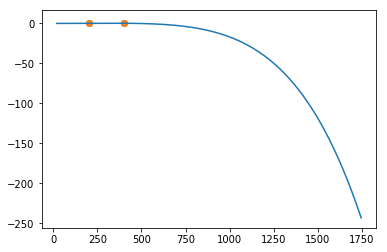

In [4]:
epoch = -1

ds = []
test_accs = []
train_accs = []
for result in results:
    ds.append(result['d'])
    train_accs.append(result['train_acc_history'][epoch])
    test_accs.append(result['test_acc_history'][epoch])

model = KernelRidge(kernel='poly', degree=5, alpha=0.00000001, gamma=0.00001)
model.fit(np.array(ds).reshape(-1, 1), test_accs)
xs = np.arange(20, 1750, 5)
preds = model.predict(np.array(xs).reshape(-1, 1))
plt.plot(xs, preds)
    
plt.scatter(ds, test_accs)
plt.scatter(ds, train_accs)
plt.show()

In [5]:
results

[{'d': 200,
  'job_id': 1,
  'test_acc_history': [0.19655652866242038,
   0.26681926751592355,
   0.28602707006369427],
  'train_acc_history': [0.19386227544910178,
   0.26362899201596807,
   0.281187624750499]},
 {'d': 400,
  'job_id': 3,
  'test_acc_history': [0.2294984076433121,
   0.28523089171974525,
   0.31727707006369427],
  'train_acc_history': [0.23262849301397207,
   0.2840880738522954,
   0.31705339321357284]}]

In [6]:
state

{'done': {1: {'d': 200, 'seed': 110}, 3: {'d': 400, 'seed': 318}},
 'n_jobs': 4,
 'ongoing': {2: {'d': 300, 'seed': 5}},
 'queue': {0: {'d': 100, 'seed': 54}, 2: {'d': 300, 'seed': 5}},
 'results': [{'d': 200,
   'job_id': 1,
   'test_acc_history': [0.19655652866242038,
    0.26681926751592355,
    0.28602707006369427],
   'train_acc_history': [0.19386227544910178,
    0.26362899201596807,
    0.281187624750499]},
  {'d': 400,
   'job_id': 3,
   'test_acc_history': [0.2294984076433121,
    0.28523089171974525,
    0.31727707006369427],
   'train_acc_history': [0.23262849301397207,
    0.2840880738522954,
    0.31705339321357284]}]}